In [145]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import time
import numpy as np
import pandas as pd

In [146]:
df=pd.read_csv('most_critical.csv')

print(df)

         C2   C6  C23             C42
0       udp  146    1         normal.
1       udp  146    1         normal.
2       udp  146    1         normal.
3       udp  146    2  snmpgetattack.
4       udp  146    2  snmpgetattack.
...     ...  ...  ...             ...
311024  udp  147    2         normal.
311025  udp  147    4         normal.
311026  udp  147    2         normal.
311027  udp  147    4         normal.
311028  udp  147    2         normal.

[311029 rows x 4 columns]


In [147]:
print(df)

         C2   C6  C23             C42
0       udp  146    1         normal.
1       udp  146    1         normal.
2       udp  146    1         normal.
3       udp  146    2  snmpgetattack.
4       udp  146    2  snmpgetattack.
...     ...  ...  ...             ...
311024  udp  147    2         normal.
311025  udp  147    4         normal.
311026  udp  147    2         normal.
311027  udp  147    4         normal.
311028  udp  147    2         normal.

[311029 rows x 4 columns]


In [148]:
number_columns = 4
df.columns
feature_names = df.columns
feature_names = feature_names[:(number_columns-1)]
print(feature_names)

Index(['C2', 'C6', 'C23'], dtype='object')


<AxesSubplot:>

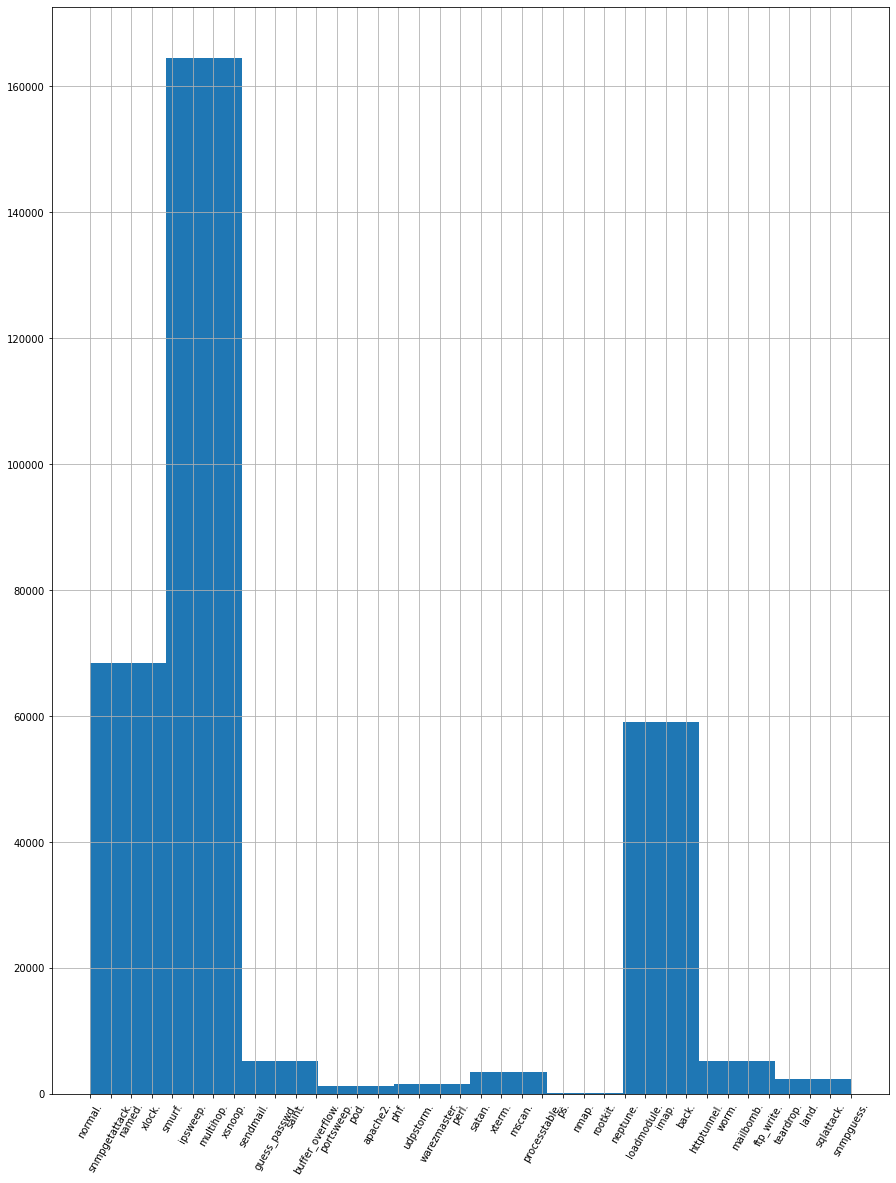

In [149]:
fig = plt.figure(figsize = (15,20))
plt.xticks(rotation = 60)
ax = fig.gca()
df['C42'].hist()

In [150]:
print(df['C42'].unique())



['normal.' 'snmpgetattack.' 'named.' 'xlock.' 'smurf.' 'ipsweep.'
 'multihop.' 'xsnoop.' 'sendmail.' 'guess_passwd.' 'saint.'
 'buffer_overflow.' 'portsweep.' 'pod.' 'apache2.' 'phf.' 'udpstorm.'
 'warezmaster.' 'perl.' 'satan.' 'xterm.' 'mscan.' 'processtable.' 'ps.'
 'nmap.' 'rootkit.' 'neptune.' 'loadmodule.' 'imap.' 'back.' 'httptunnel.'
 'worm.' 'mailbomb.' 'ftp_write.' 'teardrop.' 'land.' 'sqlattack.'
 'snmpguess.']


In [151]:
df=df[(df['C42']=='normal.') | (df['C42']=='smurf.') | (df['C42']=='snmpgetattack.') | (df['C42']=='udpstorm.') | (df['C42']=='neptune.')]
df.head()

,C2,C6,C23,C42
0,udp,146,1,normal.
1,udp,146,1,normal.
2,udp,146,1,normal.
3,udp,146,2,snmpgetattack.
4,udp,146,2,snmpgetattack.


<AxesSubplot:>

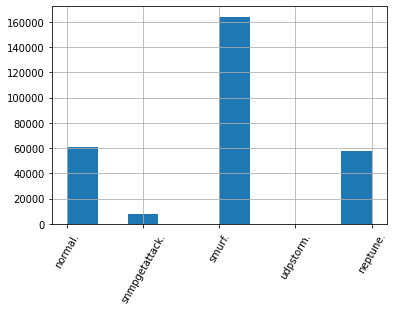

In [152]:
plt.xticks(rotation = 60)
df['C42'].hist()


In [153]:
16000/(16000+6000)
#results if the model does not train and guesses majority case

0.7272727272727273

In [154]:
data=df.values
data.shape

(290428, 4)

In [155]:
data[:,0]

array(['udp', 'udp', 'udp', ..., 'udp', 'udp', 'udp'], dtype=object)

In [156]:
#encoding data to be numerical values
le=[None]*number_columns
for i in range(number_columns):
    print(i,end=' | ')
    le[i] = LabelEncoder()
    le[i].fit(data[:,i])
    data[:,i]=le[i].transform(data[:,i])

0 | 1 | 2 | 3 | 

In [157]:
print(data)
print(len(data))
print(data[1,number_columns-1])
for i in range(len(data)):
    if data[i,number_columns-1] != 1:
        data[i,number_columns-1] = 2

[[2 119 1 1]
 [2 119 1 1]
 [2 119 1 1]
 ...
 [2 120 2 1]
 [2 120 4 1]
 [2 120 2 1]]
290428
1


In [158]:
data=data.astype('int')
print(data[:,1])
print(data)

[119 119 119 ... 120 120 120]
[[  2 119   1   1]
 [  2 119   1   1]
 [  2 119   1   1]
 ...
 [  2 120   2   1]
 [  2 120   4   1]
 [  2 120   2   1]]


In [159]:
#creating data both for training and testing
X_train,X_test,y_train,y_test=train_test_split(data[:,:number_columns-1],data[:,number_columns-1],test_size=0.2, random_state=42)

In [160]:
#training and testing the data
start = time.time()
t=tree.DecisionTreeClassifier()
t.fit(X_train,y_train)
train_time_Dtree = time.time() - start
res=t.predict(X_test)



In [161]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    t, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")



Elapsed time to compute the importances: 0.582 seconds


In [162]:
forest_importances = pd.Series(result.importances_mean, index=feature_names)

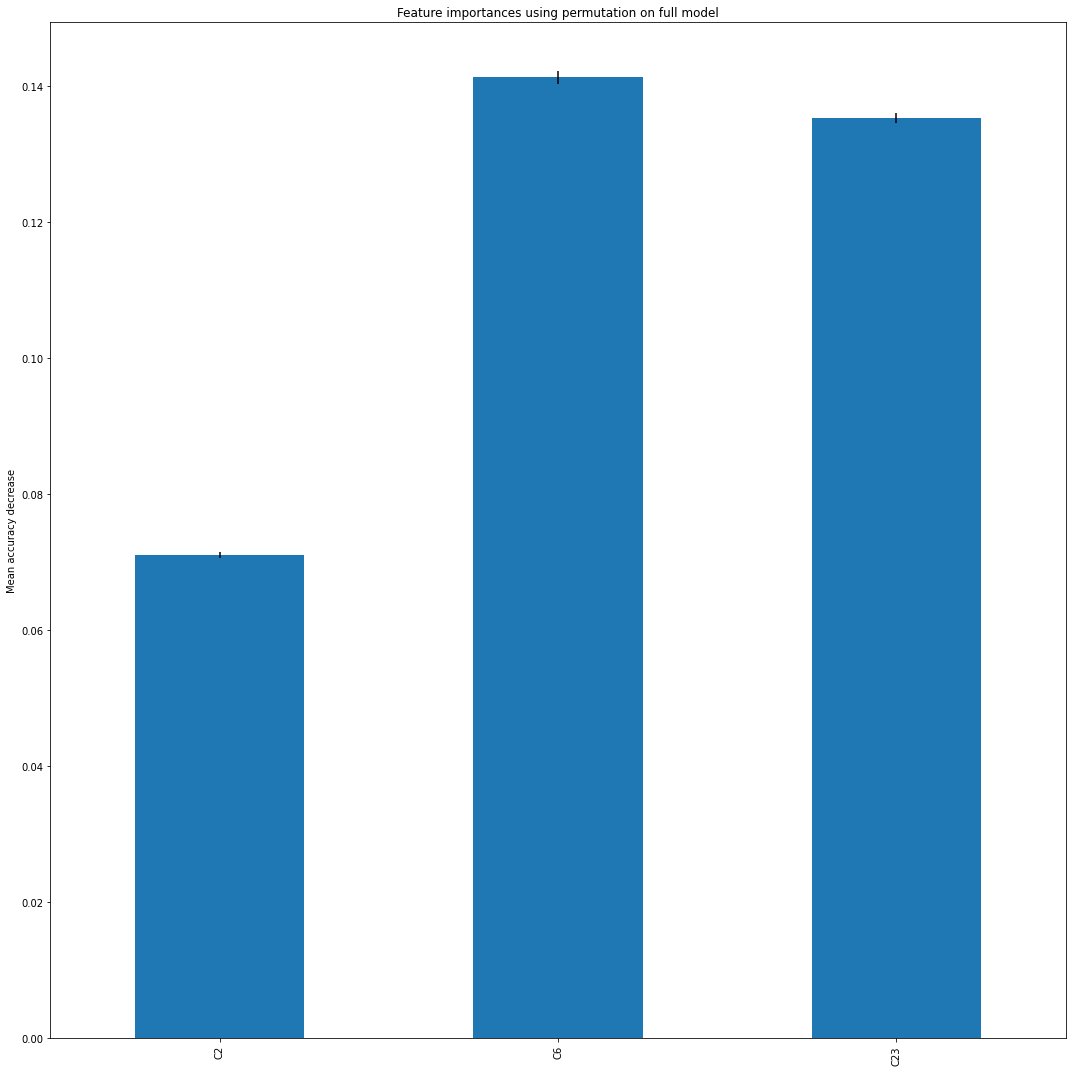

In [163]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [164]:
sum(res==y_test)/len(y_test)*100

97.80325723926592

In [165]:
res==y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [166]:
precision_score(res,y_test,average='micro')

0.9780325723926592

In [167]:
recall_score(res,y_test,average='micro')

0.9780325723926592

In [168]:
f1_score(res,y_test,average='micro')

0.9780325723926592

In [169]:
confusion_matrix(res, y_test)

array([[11196,   416],
       [  860, 45614]])

In [170]:
start = time.time()
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(X_train, y_train)
train_time_RandomForest = time.time() - start

In [171]:
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


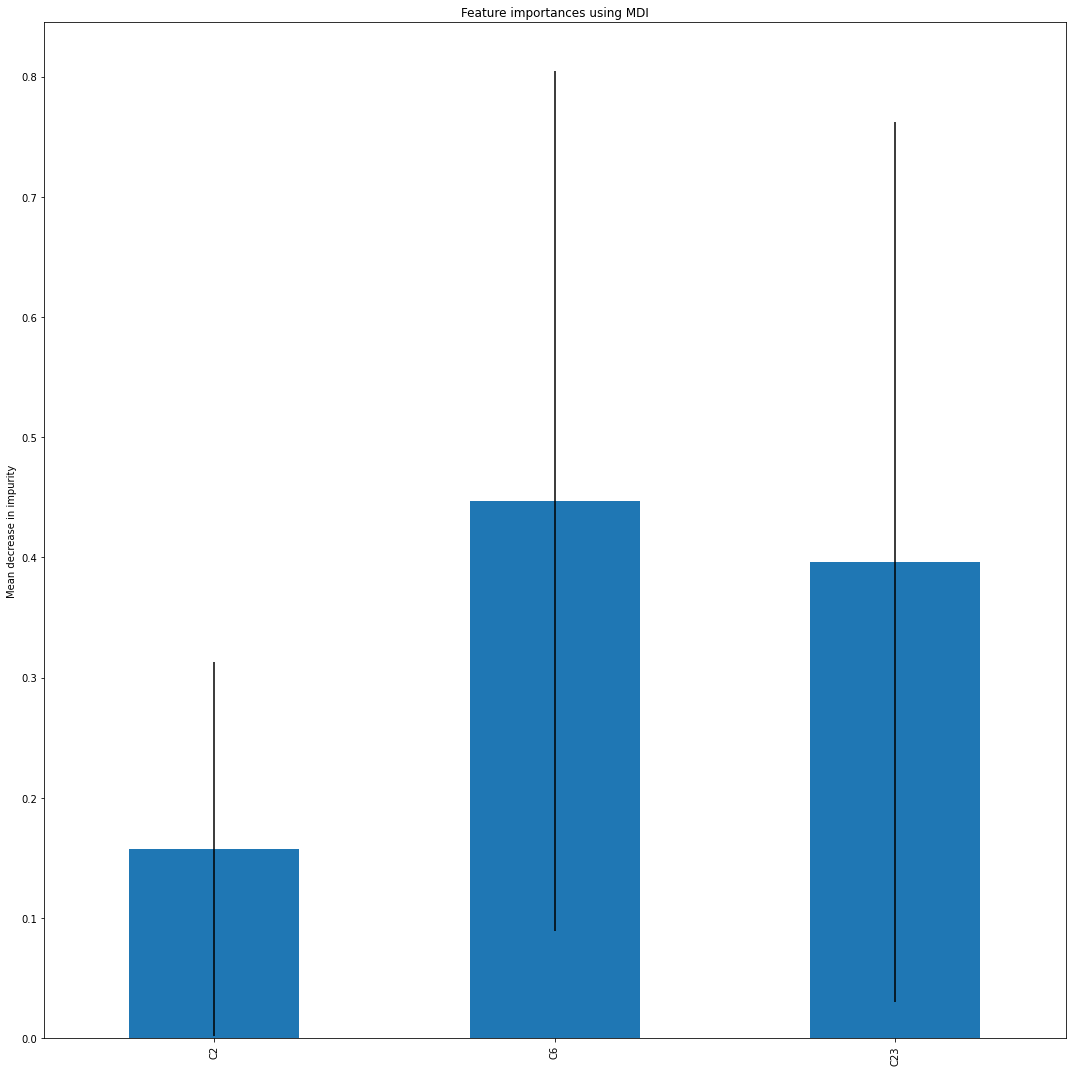

In [172]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(1,1,figsize=(15,15))
#fig = plt.figure(figsize = (15,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [173]:
start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.672 seconds


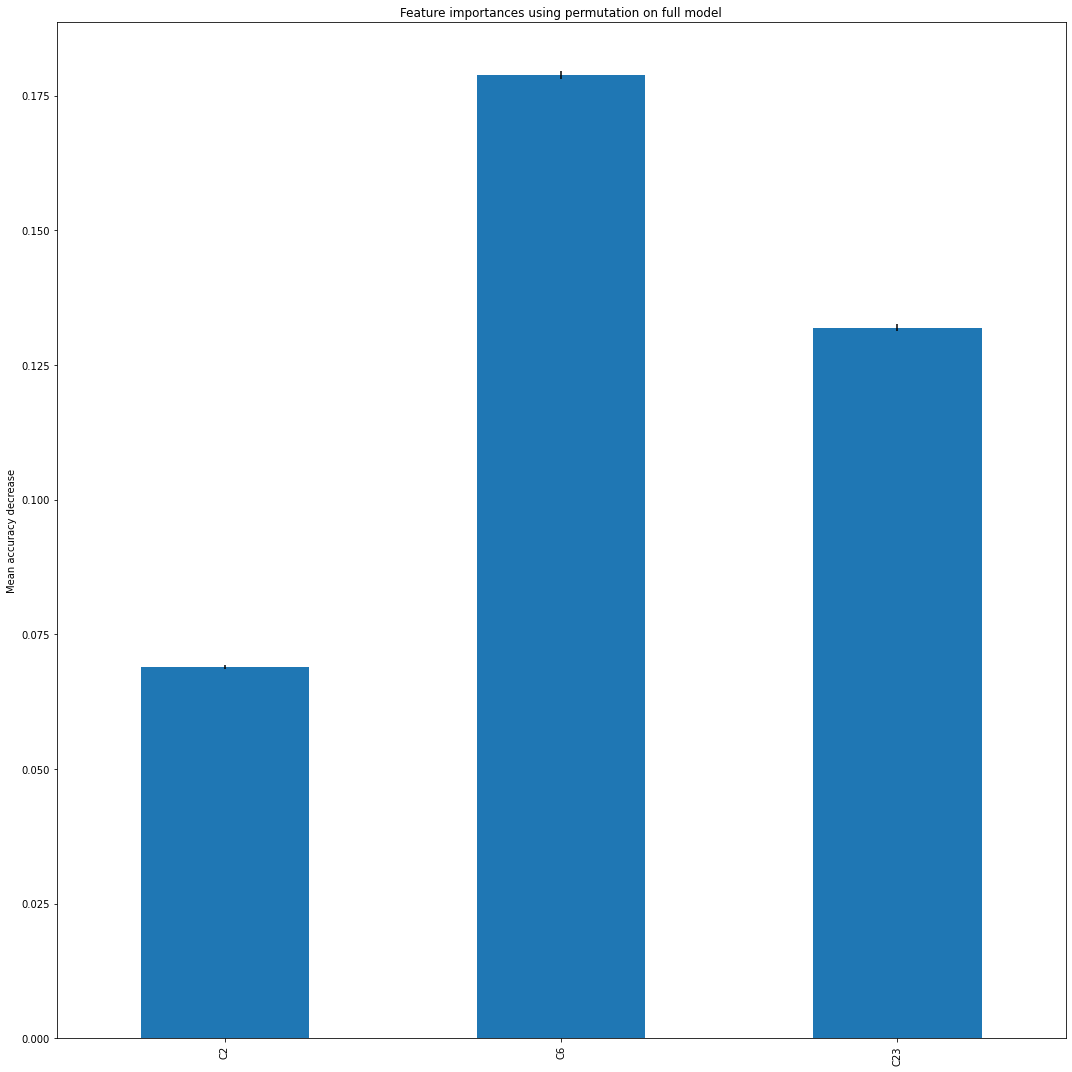

In [174]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 0.395 seconds


training times:
Decision Tree:  0.0559539794921875
Random Forest:  4.398758172988892
Quadratic Discriminant Analysis:  0.0415194034576416


In [180]:
res=clf.predict(X_test)

In [181]:
sum(res==y_test)/len(y_test)*100

97.81186516544435

In [182]:
precision_score(res,y_test,average='micro')

0.9781186516544434

In [183]:
recall_score(res,y_test,average='micro')

0.9781186516544434

In [184]:
f1_score(res,y_test,average='micro')

0.9781186516544434

In [185]:
confusion_matrix(res, y_test)

array([[11197,   412],
       [  859, 45618]])

In [186]:
start = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
train_time_QDA = time.time() - start

In [187]:
start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.372 seconds


In [191]:
res=qda.predict(X_test)

In [192]:
sum(res==y_test)/len(y_test)*100

95.6908721550804

In [193]:
precision_score(res,y_test,average='micro')

0.956908721550804

In [194]:
recall_score(res,y_test,average='micro')

0.956908721550804

In [195]:
f1_score(res,y_test,average='micro')

0.956908721550804

In [196]:
confusion_matrix(res, y_test)

array([[11095,  1542],
       [  961, 44488]])

In [197]:
print("training times:")
print("Decision Tree: ",train_time_Dtree)
print("Random Forest: ",train_time_RandomForest)
print("Quadratic Discriminant Analysis: ",train_time_QDA)

training times:
Decision Tree:  0.0559539794921875
Random Forest:  4.398758172988892
Quadratic Discriminant Analysis:  0.039917707443237305


In [198]:
start_time = time.time()
result = permutation_importance(
    qda, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 0.690 seconds


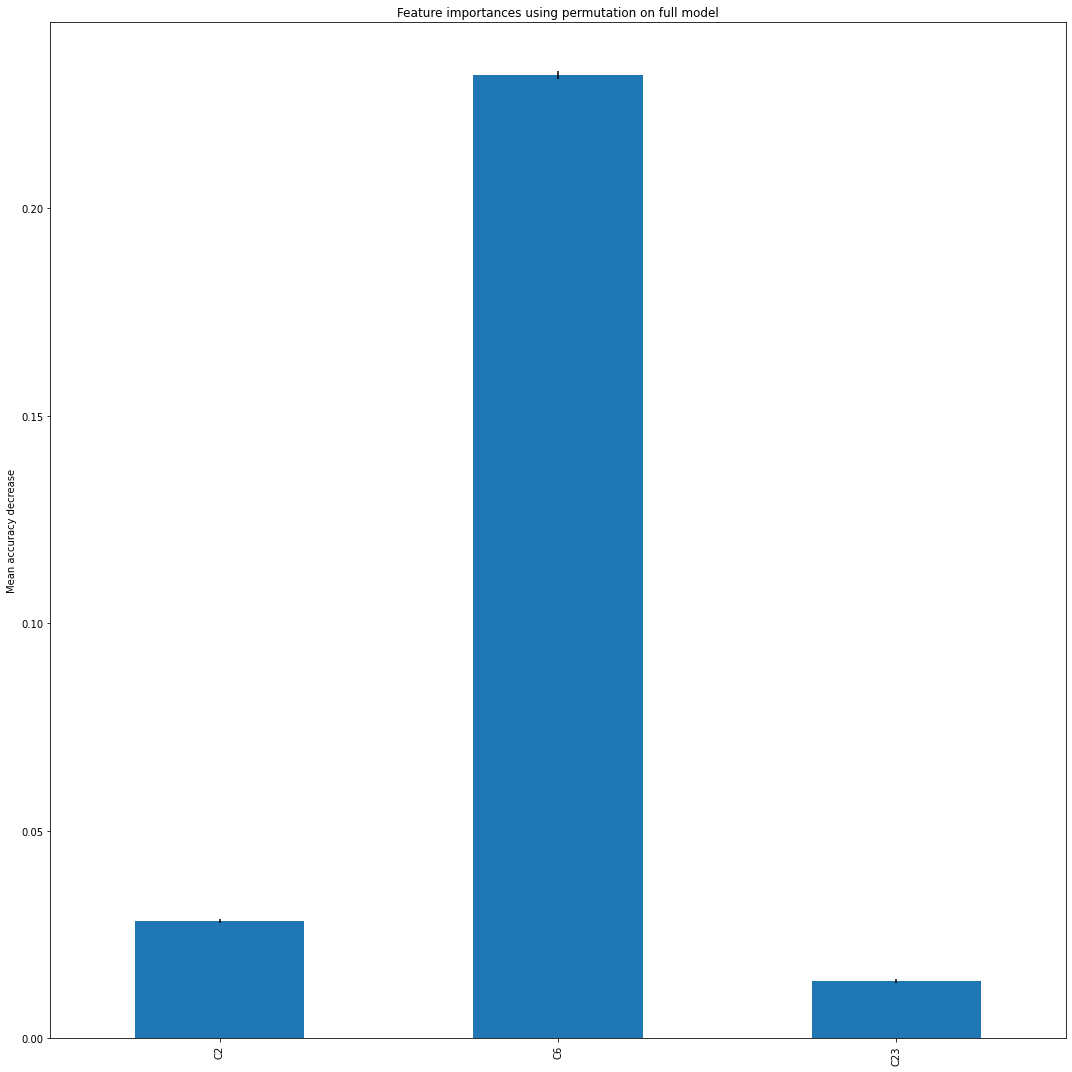

In [201]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()